## **Task 1 - Predicting the price of the house as per square feet area**
### Given Problem Statement
### 1. A simple linear regression task involving 2 variables, we need to predict the price of the house as per sqrft area. 
### 2. What will be the predicted price, if the plot size is 3000 and will the one dependent variable is enough to predict the Price of the House ?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-sales/house_sales.csv


### Step 1 : Importing Required Libraries

In [2]:
# Important Libraries
import pandas as pd

# Libraries for Visualization
import plotly.express as px
import matplotlib.pyplot as plt 

# Data Viz Lib
import seaborn as sns # not used in this code

# Data Viz Lib
import numpy as np 

# Numeric Calculation

# Library required for splitting the data in Train and Test
from sklearn.model_selection import train_test_split

# Library required for the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

# Library for the metric required to evaluate the model
from sklearn.metrics import mean_absolute_error

%matplotlib inline 
# allow to plot the charts inline

### Step 2 : Reading the data into Pandas Dataframe

In [3]:
df = pd.read_csv('/kaggle/input/house-sales/house_sales.csv')

### Step 3 : Understanding the Data

In [4]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
df.sample(10)

id             date      price  bedrooms  bathrooms  \
10029  3904980270  20150505T000000   517500.0         3        2.5   
12191  1220069035  20141120T000000   438950.0         4        2.5   
16816  8029500380  20140731T000000   305000.0         3        2.0   
20592  4215270070  20140606T000000   969990.0         4        2.5   
12364  9464700340  20140708T000000  1115000.0         4        2.5   
13362  3827600040  20140520T000000   749950.0         3        2.5   
2586   3990200125  20140711T000000   385000.0         3        2.0   
19562  3271800910  20140701T000000  1356920.0         4        3.5   
20212  6601200250  20150402T000000   205000.0         4        2.5   
7996   1909600115  20140827T000000   420000.0         3        2.0   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
10029         1800      3933     2.0           0     0  ...      8   
12191         2470    385506     2.0           0     3  ...      7   
16816         1830     10873     1.0           0     0  ...      8   
20592         4150      8436     2.0           0     0  ...     10   
12364         3180     31931     1.0           0     0  ...     10   
13362         2770     10773     2.0           0     2  ...      9   
2586          1860      7400     1.0           0     0  ...      8   
19562         4270      5800     2.0           0     3  ...     10   
20212         1767      4500     2.0           0     0  ...      8   
7996          2330      6346     1.5           0     0  ...      6   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
10029        1800              0      1989             0    98029  47.5746   
12191        2470              0      1991             0    98022  47.2396   
16816        1830              0      1989             0    98023  47.3066   
20592        4150              0      2014             0    98075  47.5802   
12364        2390            790      1978             0    98007  47.6388   
13362        2770              0      1992             0    98008  47.5754   
2586          930            930      1922          2004    98166  47.4598   
19562        3170           1100      1937             0    98199  47.6474   
20212        1767              0      2006             0    98001  47.2607   
7996         1600            730      1934          2014    98146  47.5135   

          long  sqft_living15  sqft_lot15  
10029 -122.009           1800        4659  
12191 -121.993           1680      158994  
16816 -122.394           2490        8976  
20592 -122.039           4070        8438  
12364 -122.149           3180       35007  
13362 -122.120           2530       10423  
2586  -122.352           1640        8461  
19562 -122.411           3100        5800  
20212 -122.250           1949        4636  
7996  -122.380           1380        8400  

[10 rows x 21 columns]

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
df.shape

(21613, 21)

In [9]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Step 4: Exploring the data

In [10]:
df_new = pd.DataFrame(df.price )
df_new['sqft_living'] = df.sqft_living

In [11]:
df_new.head()

price  sqft_living
0  221900.0         1180
1  538000.0         2570
2  180000.0          770
3  604000.0         1960
4  510000.0         1680

In [12]:
df_new.shape

(21613, 2)

In [13]:
df_new.isnull().sum()

price          0
sqft_living    0
dtype: int64

In [14]:
fig = px.scatter(x = df_new.price, y = df_new.sqft_living, labels = {'x' : 'price', 'y' : 'sqft_living'}, trendline="ols")
fig.data[1].line.color = 'red'
fig.show()

#### Conclusion :: 1 outlier is present

In [15]:
df_new.loc[(df_new.sqft_living>13000)] 

price  sqft_living
12777  2280000.0        13540

In [16]:
df_new.drop(df_new.query("sqft_living > 13000").index, inplace=True)

In [17]:
df_new.shape

(21612, 2)

In [18]:
fig = px.scatter(x = df_new.price, y = df_new.sqft_living, labels = {'x' : 'price', 'y' : 'sqft_living'}, trendline="ols")
fig.data[1].line.color = 'red'
fig.show()

### Step 5 : Splitting the dataset into Train and Test data

In [19]:
feature = df_new.sqft_living.values
target = df_new.price.values

In [20]:
feature = feature.reshape(-1,1)
target = target.reshape(-1,1)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)
print("X-Train :",X_train.shape)
print("X-Test :",X_test.shape)
print("Y-Train :",Y_test.shape)
print("Y-Test :",Y_test.shape)

X-Train : (17289, 1)
X-Test : (4323, 1)
Y-Train : (4323, 1)
Y-Test : (4323, 1)


### Step 6 : Implementing the Linear Regression Algorithm

In [22]:
# Instantiating the object of the class
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, Y_train)

LinearRegression()

### Plotting the Regression Line with Actual vs Predicted values

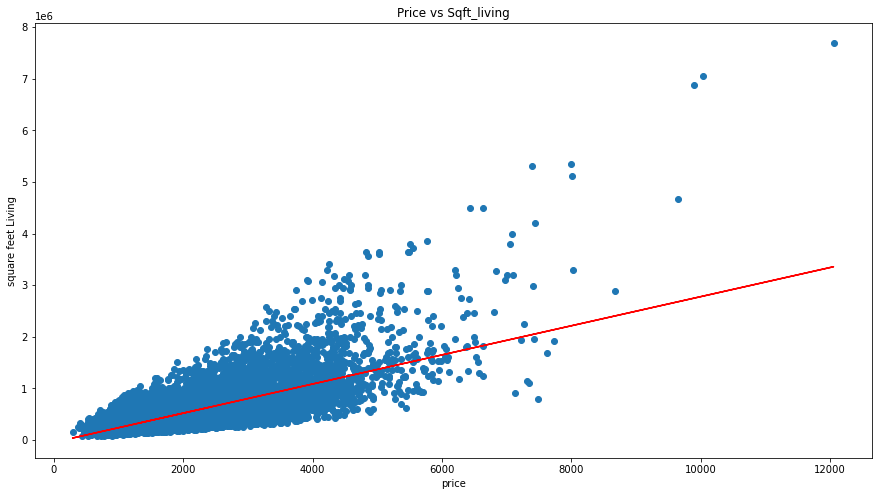

In [23]:
plt.figure(figsize = (15,8))
plt.scatter(X_train, Y_train)
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Price vs Sqft_living')
plt.xlabel('price')
plt.ylabel('square feet Living')
plt.show()

#### Predicting the values

In [24]:
pred_vals = lr.predict(X_test)
pred_vals

array([[1045528.42626356],
       [ 314046.5628408 ],
       [ 921261.23711066],
       ...,
       [ 949503.78009995],
       [ 260385.73116114],
       [ 746157.47057702]])

#### Creating a dataframe with Actual and Predicted Values

In [25]:
df_ac_vs_pr = pd.DataFrame(pred_vals, index = range(0,4323), columns = ['Predicted'])
df_ac_vs_pr['Actual'] = Y_test

In [26]:
df_ac_vs_pr.head()

Predicted     Actual
0  1.045528e+06   900000.0
1  3.140466e+05   405000.0
2  9.212612e+05   780000.0
3  6.902372e+05   379950.0
4  7.969940e+05  1061600.0

### Step 7 : Evaluating the performance of the model

In [27]:
print('Mean Absolute Error =', mean_absolute_error(Y_test, pred_vals))

Mean Absolute Error = 173617.22853030873


### Finding the solution of question asked in the problem statement

In [28]:
# Defining variable 'y' with given data
y = np.array(3000)
y = y.reshape(-1, 1)

# Predicting on the basis of the value in 'y'
pred_y = lr.predict(y)
pred_y

array([[799818.30225669]])

In [29]:
print('The score obtained after studying for {} hours = {}'.format(y[0][0], pred_y[0][0]))

The score obtained after studying for 3000 hours = 799818.3022566854


### Calculation MAPE

In [30]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [31]:
mape(Y_test, pred_vals)

35.8170035842334

In [32]:
### Conclusion :: As MAPE is 36% , that means sqft_living alone is not responsible for Proce veriation.